# Puc Minas

## Pós Graduação em Ciência de Dados e Big Data (2020-2022)

## Trabalho de Conclusão de Curso 

### Aluna: Verônica Sá Vieira da Silva



O presente Trabalho de Conclusão de Curso em Ciências de dados e Big data estuda as Rodovias do Brasil 
utilizando o dataset do site <a href="https://dados.antt.gov.br/dataset?res_format=CSV&license_id=cc-by&res_format=JSON&groups=rodovias&page=2">ANTT</a>.


### Importação das bibliotecas utilizadas:


In [220]:
# -*- coding: utf-8 -*-
### Bibliotecas
import os 
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Funcões:

In [472]:
def grafico_dispersao(x,y,titulo,eixox,eixoy):
# Gráfico de dispersao
# Identifica a correlação 
    plt.scatter(x,y)
    plt.title(titulo,fontsize=24)
    plt.xlabel(eixox,fontsize=14)
    plt.ylabel(eixoy,fontsize=14)
    plt.show

In [541]:
def grafico_barras_horizontal(x,y,marcador,titulo,eixox,eixoy):
    #Definindo o grafico
    plt.bar(x, y, label = marcador, color = 'r')
    plt.title(titulo,fontsize=24)
    plt.xlabel(eixox,fontsize=14)
    plt.ylabel(eixoy,fontsize=14)
    plt.style.use("ggplot")
    plt.show()
    

In [441]:
def grafico_barras_vertical(x,y,titulo,eixox,eixoy):
    plt.style.use("ggplot")
    plt.barh(x,y)
    plt.title(titulo,fontsize=24)
    plt.xlabel(eixox,fontsize=14)
    plt.ylabel(eixoy,fontsize=14)
    plt.show()

In [386]:
def grafico_linha(x,y,titulo,eixox,eixoy):
    
    plt.plot(x,y)
    plt.title(titulo,fontsize=24)
    plt.xlabel(eixox,fontsize=14)
    plt.ylabel(eixoy,fontsize=14)
    plt.show()

In [594]:
def grafico_tres_variaveis(x,legenda1,y,legenda2,marcador,titulo):
    fig,varx = plt.subplots()
    eixo_x = []
    eixo_y = []
    m = []
    for i in x:
        eixo_x.append(i)
    for i in y: 
        eixo_y.append(i)
    for i in marcador:
        m.append(i)
        
    # Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
    x1 =  np.arange(len(eixo_x))
    x2 = [x + 0.25 for x in x1]

    # Plota as barras
    plt.bar(x1, eixo_x, width=0.25, label = legenda1, color = 'b')
    plt.bar(x2, eixo_y, width=0.25, label = legenda2, color = 'y')

    # coloca o nome dos meses como label do eixo x
    plt.xticks([x + 0.25 for x in range(len(eixo_x))], m)
    
    # inseri uma legenda no gráfico
    plt.legend()
    plt.title(titulo)
    plt.show()
    

### Coleta de Dados:

Dando início à coleta de dados, as informações foram extraídas dos arquivos disponibilizados pela ANTT referente à acidentes, rodovias, postos das rodovias federais, informações dos terrenos e dos radares. 
Cada dataset foi separado por entidades para melhor manuseio das informações das rodovias.

In [487]:
DIRETORIO = os.path.join(os.getcwd(),'..','files')


### Acidentes
# Foi necessário agrupar 24 arquivos CSV pois a ANTT dividiu todos os acidentes por concessionária.
all_files = glob.glob(os.path.join(DIRETORIO,'acidentes_antt') + "/*.csv")

li = []
#columns_types = {'data': str, 'n_da_ocorrencia': str, 'tipo_de_ocorrencia': str, 'trecho': str, 'tipo_de_acidente': str}

for filename in all_files:
    
    df = pd.read_csv(filename, index_col=None, header=0, delimiter = ";", encoding="iso8859-1", low_memory = False)
    li.append(df)

df_acidentes = pd.concat(li, axis=0, ignore_index=True)

### Radar
df_radar = pd.read_csv(os.path.join(DIRETORIO,'radar','dados_dos_radares.csv'), encoding="iso8859-1",delimiter = ";", low_memory = False)

### Terreno
df_terreno = pd.read_csv(os.path.join(DIRETORIO,'terreno','dados_perfil_do_terreno.csv'), encoding="iso8859-1",delimiter = ";", low_memory = False)

### Postos PRF
df_postos_prf = pd.read_csv(os.path.join(DIRETORIO,'posto_prf','dados_dos_postos_prfs.csv'), encoding="iso8859-1",delimiter = ";", low_memory = False)



### Tratamento de Dados:

1. Tratando Inconsistências:

Pela natureza do dataset, muitos dados são manuais e precisam ser tratados e agrupados. Foram criados novas colunas no dataset de Acidentes e no dataset de Terrenos (UF e Rodovia) e foram feitos replaces na coluna de TIPO_DE_OCORRENCIA dos acidentes que descreve o tipo de acidente ocorrido. Muitas descrições não estão padronizadas, essa sessão tem o intuito de remover as inconsistências causadas por dados manuais.

In [522]:
## Criar as colunas Rodovia e UF no dataset de Acidentes.
df_acidentes['rodovia'] = df_acidentes.trecho
df_acidentes[['rodovia','uf']] = df_acidentes['rodovia'].str.split('/',expand=True)

## Criar as colunas Rodovia e UF no dataset de Terrenos.
df_terreno['rodovia'] = df_terreno.rodovia_uf
df_terreno[['rodovia','uf']] = df_terreno['rodovia'].str.split('/',expand=True)

## Criar campo de ano e mês no dataset de Acidentes
df_acidentes['data']= pd.to_datetime(df['data']) 
df_acidentes['ano'] = df_acidentes['data'].dt.year 
df_acidentes['mes'] = df_acidentes['data'].dt.month 

### Replace:
# Rodovias:
df_acidentes['rodovia'].replace('Retão', 'BR-116',inplace=True)
df_acidentes['rodovia'].replace('Contorno', 'BR-101',inplace=True)
df_acidentes['rodovia'].replace('CONTORNO', 'BR-101',inplace=True)
df_terreno['rodovia'].replace('Contorno','BR-101',inplace=True)
df_terreno['rodovia'].replace('Contorno de Iconha','BR-101',inplace=True)
df_terreno['rodovia'].replace('Contorno de Uberlândia','BR-365',inplace=True)
df_terreno['rodovia'].replace('CONTORNO NORTE  - FS - 324','BR-324',inplace=True)

# UF
df_acidentes['uf'].replace('BA - ContSuFS','BA',inplace=True)
df_acidentes['uf'].replace('BA - Cont VC','BA',inplace=True)
df_acidentes['uf'].replace('ES (Contorno de Vitória)','ES',inplace=True)
df_acidentes['uf'].replace('ES (Contorno de Iconha)','ES',inplace=True)
df_acidentes['uf'].replace('ES (Contorno Iconha)','ES',inplace=True)

# Tipo de Ocorrencia:
df_acidentes['tipo_de_ocorrencia'].replace('sem vítima', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente sem vítima', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('ASV - Acidente SEM Vítima', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('ac03 - Acidente sem Vitimas', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Sem vítima', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente sem Vítimas', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente sem Vítima', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente sem VITIMA', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC3 - Acidente sem VITIMA', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente sem vítima - TRECHO CONTORNO', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente sem Vítima - TRECHO CONTORNO', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente sem Vítima', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC03 - ACIDENTE SEM VÍTIMA', 'Acidente sem vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC03 - Acidente sem VITIMA', 'Acidente sem vitima',inplace=True)


df_acidentes['tipo_de_ocorrencia'].replace('com vítima', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com Vítima', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com vítima', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('2 - Acidente com VITIMA', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AV - Acidente com VITIMA', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('ac02 - Acidente com VITIMA', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Com vítima', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente COM VITIMA', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com Vítimas', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('2- Acidente com VITIMA', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('ac02 - Acidente com Vítima', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace(' 2- Acidente com VITIMA', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com VITIMA', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('ac03 - Acidente com vítima ilesa', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('2 - Acidente com Vitima', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com vítima - TRECHO CONTORNO', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com Vítima - TRECHO CONTORNO', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC02 - ACIDENTE COM VÍTIMA', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('3 - Acidente com Vitima Sem Lesão', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC02 - Acidente com VITIMA', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('ac02 - Acidente com vítima', 'Acidente com vitima',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC2 - Acidente com VITIMA', 'Acidente com vitima',inplace=True)



df_acidentes['tipo_de_ocorrencia'].replace('1 - Acidente com Vitima Fatal', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AF - Acidente com Vitima Fatal', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com morte', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('ac01 - Acidente com Vitima Fatal', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente Fatal', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente fatal', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com morte - TRECHO CONTORNO', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('ac01 - Acidente com vitima fatal', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC1 - Acidente com VITIMA FATAL', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com VITIMA FATAL', 'Acidente com Vitima Fatal',inplace=True)

df_acidentes['tipo_de_ocorrencia'].replace('Acidente com Morte - TRECHO CONTORNO', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Acidente com Morte', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC01 - ACIDENTE COM VÍTIMA FATAL', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC01 - Acidente com VITIMA FATAL', 'Acidente com Vitima Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('ac01 - Acidente com Vítima Fatal', 'Acidente com Vitima Fatal',inplace=True)


df_acidentes['tipo_de_ocorrencia'].replace('3 - Acidente com Danos Materiais', 'Acidente com Danos Materiais',inplace=True)

df_acidentes['tipo_de_ocorrencia'].replace('Atropelamento com morte', 'Atropelamento Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Atropelamento com Morte', 'Atropelamento Fatal',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC05 - Atropelamento Fatal', 'Atropelamento Fatal',inplace=True)

df_acidentes['tipo_de_ocorrencia'].replace('Atropelamento sem Morte - TRECHO CONTORNO', 'Atropelamento',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('AC04 - Atropelamento', 'Atropelamento',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Atropelamento sem morte', 'Atropelamento',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Atropelamento sem Morte', 'Atropelamento',inplace=True)
df_acidentes['tipo_de_ocorrencia'].replace('Atropelamento sem morte - TRECHO CONTORNO', 'Atropelamento',inplace=True)


df_acidentes['tipo_de_ocorrencia'].replace('in21 - Suícidio', 'Suícidio',inplace=True)

df_acidentes['tipo_de_ocorrencia'].replace('A PP - Acidente envolvendo Produto Perigoso', 'Acidente envolvendo Produto Perigoso',inplace=True)


df_acidentes['tipo_de_ocorrencia'].replace('A PPV - Acidente envolvendo Produto Perigoso com vitima', 'Acidente envolvendo Produto Perigoso com vitima',inplace=True)

df_acidentes['tipo_de_ocorrencia'].replace('A PPF - Acidente envolvendo Produto Perigoso vitima fatal', 'Acidente envolvendo Produto Perigoso vitima fatal',inplace=True)

df_acidentes['tipo_de_ocorrencia'].replace('ac03 - Acidente com Danos Materiais', 'Acidente com Danos Materiais',inplace=True)
 
## Verificando os valores únicos para TIPO_DE_OCORRENCIA
# print(df_acidentes['tipo_de_ocorrencia'].unique())

2. Removendo valores nulos

Removendo valores nulos e preenchendo com valores relevantes para o projeto.

In [501]:
# Identificando valores Nulos em colunas - Acidentes
df_acidentes.isna().any()

data                               True
horario                           False
n_da_ocorrencia                   False
tipo_de_ocorrencia                 True
km                                 True
trecho                            False
sentido                            True
tipo_de_acidente                   True
automovel                          True
bicicleta                          True
caminhao                           True
moto                               True
onibus                             True
outros                             True
tracao_animal                      True
transporte_de_cargas_especiais     True
trator_maquinas                    True
utilitarios                        True
ilesos                             True
levemente_feridos                  True
moderadamente_feridos              True
gravemente_feridos                 True
mortos                             True
rodovia                           False
uf                                 True


In [503]:
# Preenchendo os valores nulos
df_acidentes.data.fillna('00-00-000', inplace=True)
df_acidentes.horario.fillna('N/A', inplace=True)
df_acidentes.n_da_ocorrencia.fillna(0, inplace=True)
df_acidentes.tipo_de_ocorrencia.fillna('Não Informado', inplace=True)
df_acidentes.km.fillna(0, inplace=True)
df_acidentes.trecho.fillna('Não Informado', inplace=True)
df_acidentes.sentido.fillna('N/A', inplace=True)
df_acidentes.tipo_de_acidente.fillna('Não Informado', inplace=True)
df_acidentes.automovel.fillna(0, inplace=True)
df_acidentes.bicicleta.fillna(0, inplace=True)
df_acidentes.caminhao.fillna(0, inplace=True)
df_acidentes.moto.fillna(0, inplace=True)
df_acidentes.onibus.fillna(0, inplace=True)
df_acidentes.outros.fillna(0, inplace=True)
df_acidentes.tracao_animal.fillna(0, inplace=True)
df_acidentes.automovel.fillna(0, inplace=True)
df_acidentes.transporte_de_cargas_especiais.fillna(0, inplace=True)
df_acidentes.trator_maquinas.fillna(0, inplace=True)
df_acidentes.utilitarios.fillna(0, inplace=True)
df_acidentes.ilesos.fillna(0, inplace=True)
df_acidentes.levemente_feridos.fillna(0, inplace=True)
df_acidentes.moderadamente_feridos.fillna(0, inplace=True)
df_acidentes.gravemente_feridos.fillna(0, inplace=True)
df_acidentes.mortos.fillna(0, inplace=True)
df_acidentes.uf.fillna('N/A',inplace=True)
df_acidentes.ano.fillna(0,inplace=True)
df_acidentes.mes.fillna(0,inplace=True)

In [504]:
# Identificando valores Nulos em colunas - Radar
df_radar.isna().any()

concessionaria        False
ano_do_pnv_snv        False
tipo_de_radar         False
rodovia               False
uf                    False
km_m                  False
municipio             False
tipo_pista            False
sentido               False
situacao              False
data_da_inativacao     True
latitude              False
longitude             False
velocidade_leve       False
velocidade_pesado     False
dtype: bool

In [505]:
# Preenchendo os valores nulos
df_radar.data_da_inativacao.fillna('00-00-000', inplace=True)

In [424]:
# Identificando valores Nulos em colunas - Terreno
df_terreno.isna().any()

concessionaria            False
ano_do_pnv_snv            False
rodovia_uf                False
tipo_pista                False
sentido                   False
tipo_perfil_de_terreno    False
km_m_inicial              False
latitude_inicial          False
longitude_inicial         False
latitude_final            False
km_m_final                False
longitude_final           False
rodovia                   False
uf                        False
dtype: bool

In [425]:
# Identificando valores Nulos em colunas - Postos PRF
df_postos_prf.isna().any()

concessionaria        False
nome_posto_prf        False
ano_do_pnv_snv        False
rodovia               False
uf                    False
km_m                  False
municipio             False
tipo_pista            False
sentido               False
situacao              False
data_da_inativacao     True
latitude              False
longitude             False
dtype: bool

In [506]:
# Preenchendo os valores nulos
df_postos_prf.data_da_inativacao.fillna('00-00-000', inplace=True)

In [560]:
# Removendo duplicadas considerando todas as colunas

df_acidentes.drop_duplicates();
df_radar.drop_duplicates();
df_terreno.drop_duplicates();
df_postos_prf.drop_duplicates();


3. Exclusão de registros

Neste trabalho iremos estudar apenas as rodovias federais do Brasil. Foram encontrados nos dados rodovias fora do escopo.
Por esse motivo, o código abaixo filtra  todos os datasets apenas pelas rodovias federais do Brasil.

In [508]:
df_acidentes = df_acidentes[df_acidentes['rodovia'].str.contains("BR")]
df_terreno = df_terreno[df_terreno['rodovia'].str.contains("BR")]
df_postos_prf = df_postos_prf[df_postos_prf['rodovia'].str.contains("BR")]

Outro filtro necessário são os radares e postos da Polícia Federal ativos:

In [509]:
df_radar = df_radar[df_radar['situacao'].str.contains("Ativo")]
df_postos_prf = df_postos_prf[df_postos_prf['situacao'].str.contains("Ativo")]

### Análise e Exploração dos Dados

Para entender melhor o conjunto de dados estudado no presente trabalho, iniciaremos a fase de Análise e Exploração dos dados que visa identificar as principais características dos dados.

Com a análise será possível identificar padrões e destacar traços relevantes do assunto trabalhado.

Segue abaixo alguns tópicos para essa sessão:
1. Quais rodovias possuem mais acidentes por ano?
2. Quais rodovias possuem mais acidentes com vítima fatal?
3. Quantos radares por rodovia?
4. Quantos postos de polícia federal por rodovia?
5. Quais tipos de acidentes em cada rodovia?
6. Quais tipos de terrenos em cada rodovia?
7. Qual a correlação de radares ativos com a quantidade de acidentes em cada rodovia?
8. Qual a correlação de terrenos com a quantidade de acidentes em cada rodovia?

1. Quais rodovias possuem mais acidentes por ano?

In [532]:
# Filtrando os acidentes que possuem o ano referenciado
df_acidentes_ano = df_acidentes.loc[df_acidentes['ano'] != 0]

# Calculando a quantidade de acidentes por ano e mês
qtd_acidentes_ano = df_acidentes_ano.groupby(['rodovia','ano']).size().reset_index(name='qtd_acidentes').sort_values(by=['qtd_acidentes'], ascending=False)

# Calculando a quantidade de acidentes
qtd_acidentes = df_acidentes.groupby(['rodovia']).size().reset_index(name='qtd_acidentes').sort_values(by=['qtd_acidentes'], ascending=False)

qtd_acidentes_ano.head()


,rodovia,ano,qtd_acidentes
1,BR-393,2020.0,2670
2,BR-393,2021.0,2444
0,BR-393,2019.0,1565


2. Quais rodovias possuem mais acidentes com vítima fatal?

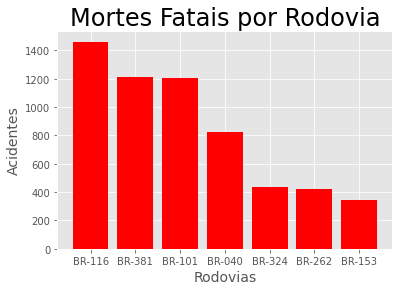

In [542]:
qtd_fatal = df_acidentes[df_acidentes['mortos'] != 0].groupby(['rodovia','uf']).size().reset_index(name='mortes').sort_values(by=['mortes'], ascending=False)
qtd_fatal = qtd_fatal.head(15)

grafico_barras_horizontal(qtd_fatal['rodovia'],qtd_fatal['mortes'],'Mortes Fatais','Mortes Fatais por Rodovia','Rodovias','Acidentes')



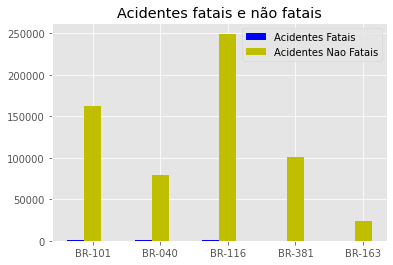

In [607]:
# Filtrando por acidentes fatais e nao fatais
acidentes_fatais= df_acidentes[df_acidentes['tipo_de_ocorrencia'].isin(['Acidente envolvendo Produto Perigoso vitima fatal','Acidente com Vitima Fatal','Atropelamento Fatal'])]
acidentes_nao_fatais= df_acidentes[~df_acidentes['tipo_de_ocorrencia'].isin(['Acidente envolvendo Produto Perigoso vitima fatal','Acidente com Vitima Fatal','Atropelamento Fatal'])]

# Calculando a quantidade de acidentes fatais
qtd_acidentes_fatais = acidentes_fatais.groupby(['rodovia']).size().reset_index(name='qtd_acidentes_fatais').sort_values(by=['qtd_acidentes_fatais'], ascending=False)

# Calculando a quantidade de acidentes nao fatais
qtd_acidentes_n_fatais = acidentes_nao_fatais.groupby(['rodovia']).size().reset_index(name='qtd_acidentes_n_fatais').sort_values(by=['qtd_acidentes_n_fatais'], ascending=False)

    
# Merge
acidentes_categorizados = pd.merge(qtd_acidentes_fatais, qtd_acidentes_n_fatais, on=["rodovia"], how='left')
acidentes_categorizados = acidentes_categorizados.head(5)

grafico_tres_variaveis(acidentes_categorizados['qtd_acidentes_fatais'],'Acidentes Fatais',acidentes_categorizados['qtd_acidentes_n_fatais'],'Acidentes Nao Fatais',acidentes_categorizados['rodovia'],'Acidentes fatais e não fatais')


3. Quantos radares por rodovia?

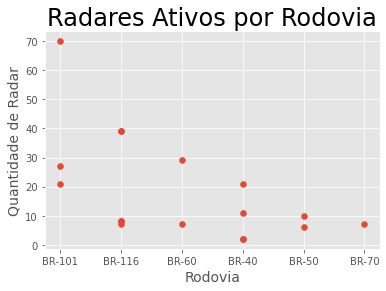

In [513]:
qtd_radar =df_radar[df_radar['situacao'] == 'Ativo'].groupby(['rodovia','uf']).size().reset_index(name='radar').sort_values(by=['radar'], ascending=False)

grafico_dispersao(qtd_radar['rodovia'],qtd_radar['radar'],'Radares Ativos por Rodovia','Rodovia','Quantidade de Radar')

4.Quantos postos de polícia federal por rodovia?

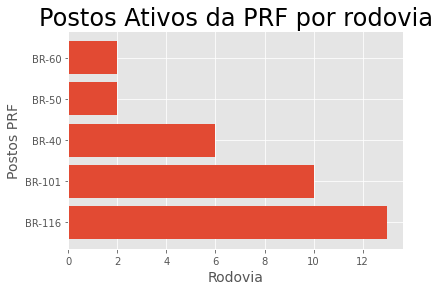

In [514]:
qtd_postos =df_postos_prf[df_postos_prf['situacao'] == 'Ativo'].groupby(['rodovia','uf']).size().reset_index(name='postos_prf').sort_values(by=['postos_prf'], ascending=False)
qtd_postos.head()

grafico_barras_vertical(qtd_postos['rodovia'],qtd_postos['postos_prf'],'Postos Ativos da PRF por rodovia','Rodovia','Postos PRF')

5. Quais tipos de acidentes em cada rodovia?

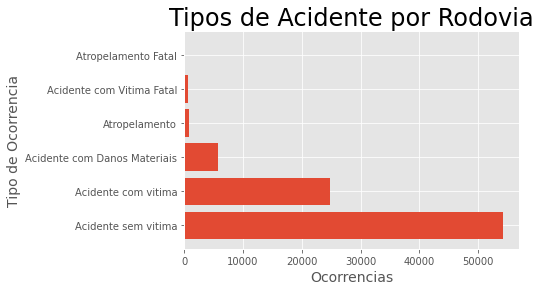

In [528]:
tipo_acidentes_por_rodovia = df_acidentes.groupby(['rodovia','tipo_de_ocorrencia','uf']).size().reset_index(name='qtd_ocorrencias').sort_values(by=['qtd_ocorrencias'], ascending=False)
tipo_acidentes_por_rodovia = tipo_acidentes_por_rodovia.head(100)

grafico_barras_vertical(tipo_acidentes_por_rodovia['tipo_de_ocorrencia'],tipo_acidentes_por_rodovia['qtd_ocorrencias'],'Tipos de Acidente por Rodovia','Ocorrencias','Tipo de Ocorrencia')

6. Quais tipos de terrenos por cada rodovia?

In [238]:
tipo_terreno_por_rodovia =df_terreno.groupby(['rodovia','tipo_perfil_de_terreno','uf']).size().reset_index(name='qtd_perfil_terreno').sort_values(by=['qtd_perfil_terreno'], ascending=False)
tipo_terreno_por_rodovia.head()

,rodovia,tipo_perfil_de_terreno,uf,qtd_perfil_terreno
19,BR-116,Perfil Ondulado,SC,2190
9,BR-101,Perfil Plano,RJ,1302
31,BR-50,Perfil Montanhoso,MG,1225
16,BR-116,Perfil Ondulado,PR,776
34,BR-50,Perfil Plano,GO,733


7. Qual a correlação de radares ativos com a quantidade de acidentes em cada rodovia?

In [239]:
results_radar = pd.merge(qtd_radar, qtd_acidentes, on=["rodovia","uf"], how='inner')

print(results_radar.head())

Empty DataFrame
Columns: [rodovia, uf, radar, ano, mes, qtd_acidentes]
Index: []


8. Qual a correlação dos Terrenos nas rodovias com a quantidade de acidente?

In [254]:
df_terreno_teste = tipo_terreno_por_rodovia.drop_duplicates(subset=['rodovia','uf','tipo_perfil_de_terreno'])
df_acidentes_teste = qtd_acidentes.drop_duplicates(subset=['rodovia','uf'])

results_terrenos = pd.merge(df_terreno_teste, df_acidentes_teste, on=["rodovia","uf"], how='inner')
print(results_terrenos.head(100))

   rodovia tipo_perfil_de_terreno  uf  qtd_perfil_terreno  qtd_acidentes
0   BR-116        Perfil Ondulado  SC                2190          10696
1   BR-116      Perfil Montanhoso  SC                 280          10696
2   BR-116           Perfil Plano  SC                 274          10696
3   BR-101           Perfil Plano  RJ                1302          45443
4   BR-101        Perfil Ondulado  RJ                 330          45443
5   BR-101      Perfil Montanhoso  RJ                 110          45443
6   BR-116        Perfil Ondulado  PR                 776          77347
7   BR-116      Perfil Montanhoso  PR                 221          77347
8   BR-116           Perfil Plano  PR                 104          77347
9   BR-101        Perfil Ondulado  ES                 536          31546
10  BR-101      Perfil Montanhoso  ES                  34          31546
11  BR-101           Perfil Plano  ES                   4          31546
12  BR-101           Perfil Plano  RS              

Tipo de veículo envolvido nos acidentes

Tipo de acidentes por rodovia

#### Testes de hipotese e intervalos de confianca

Teste Qui-quadrado para homogeneidade

Ho -> não há diferença de acidentes fatais e não fatais entre automóveis e bicicletas
Ha -> 

Amostra aleatória dentro do dataset de acidentes e terreno.


In [350]:
# Calculando a quantidade de acidentes fatais

acidentes_fatais_automovel = acidentes_fatais.loc[(acidentes_fatais['automovel'] != 0) & (acidentes_fatais['mortos'] != 0)]
acidentes_fatais_bicleta = acidentes_fatais.loc[(acidentes_fatais['bicicleta'] != 0) & (acidentes_fatais['mortos'] != 0)]
qtd_acidentes_fatais_automovel = acidentes_fatais_automovel.groupby(['rodovia','uf']).size().reset_index(name='qtd_acidentes_fatais').sort_values(by=['qtd_acidentes_fatais'], ascending=False)
qtd_acidentes_fatais_bicicleta = acidentes_fatais_bicleta.groupby(['rodovia','uf']).size().reset_index(name='qtd_acidentes_fatais').sort_values(by=['qtd_acidentes_fatais'], ascending=False)

# Calculando a quantidade de acidentes nao fatais
acidentes_n_fatais_automovel = acidentes_nao_fatais.loc[(acidentes_nao_fatais['automovel'] != 0) & (acidentes_fatais['mortos'] == 0)]
acidentes_n_fatais_bicleta = acidentes_nao_fatais.loc[(acidentes_nao_fatais['bicicleta'] != 0) & (acidentes_fatais['mortos'] == 0)]
qtd_acidentes_n_fatais_automovel = acidentes_n_fatais_automovel.groupby(['rodovia','uf']).size().reset_index(name='qtd_acidentes_n_fatais').sort_values(by=['qtd_acidentes_n_fatais'], ascending=False)
qtd_acidentes_n_fatais_bicicleta = acidentes_n_fatais_bicleta.groupby(['rodovia','uf']).size().reset_index(name='qtd_acidentes_n_fatais').sort_values(by=['qtd_acidentes_n_fatais'], ascending=False)

# Merge de acidentes fatais e nao fatais - Bicicleta
qtd_acidentes_fatais_bicicleta.head()

# Merge de acidentes fatais e nao fatais - Automovél

,rodovia,uf,qtd_acidentes_fatais
5,BR-101,ES,60
1,BR-040,MG,19
14,BR-116,SP,18
6,BR-101,RJ,12
7,BR-101,SC,12


In [335]:
qtd_acidentes_fatais_bicicleta.head()

,rodovia,uf,qtd_acidentes_fatais
5,BR-101,ES,60
1,BR-040,MG,19
14,BR-116,SP,18
6,BR-101,RJ,12
7,BR-101,SC,12


In [300]:
# Filtrando apenas por Perfil Montanhoso 
perfil_montanhoso= acidentes_e_terrenos[acidentes_e_terrenos['tipo_perfil_de_terreno'] == 'Perfil Montanhoso']
perfil_montanhoso.drop(columns=['uf'])

# Filtrando apenas por Perfil Plano 
perfil_plano = acidentes_e_terrenos[acidentes_e_terrenos['tipo_perfil_de_terreno'] == 'Perfil Plano']
perfil_plano.drop(columns=['uf'])

perfil_plano.head()


,rodovia,tipo_perfil_de_terreno,uf,qtd_perfil_terreno,qtd_acidentes_n_fatais,qtd_acidentes_fatais
2,BR-116,Perfil Plano,SC,274,10673,23
8,BR-116,Perfil Plano,PR,104,77298,49
13,BR-116,Perfil Plano,SP,396,72845,186
16,BR-116,Perfil Plano,RJ,340,65061,101
20,BR-116,Perfil Plano,RS,6,3522,18


Tabela de Valor Esperado:

In [301]:
perfil_montanhoso.head()

,rodovia,tipo_perfil_de_terreno,uf,qtd_perfil_terreno,qtd_acidentes_n_fatais,qtd_acidentes_fatais
1,BR-116,Perfil Montanhoso,SC,280,10673,23
7,BR-116,Perfil Montanhoso,PR,221,77298,49
14,BR-116,Perfil Montanhoso,SP,102,72845,186
18,BR-116,Perfil Montanhoso,RJ,257,65061,101


In [324]:
#br_116= br_116[br_116['ano_do_pnv_snv']== 2017]

#br_116.head(100)
acidentes_nao_fatais[acidentes_nao_fatais['ano']== '2017']

acidentes_nao_fatais['ano'].unique()

df_acidentes.head()



,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,...,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,rodovia,uf,ano,mes
0,2019-01-04 00:00:00,04:21:00,18,Acidente sem vitima,167,BR-393/RJ,Norte,Derrapagem,1,0.0,...,0,1,0.0,0.0,0.0,0.0,BR-393,RJ,2019,1
1,2019-01-04 00:00:00,19:29:00,81,Acidente com vitima,"266,4",BR-393/RJ,Sul,Derrapagem,0,0.0,...,0,0,2.0,1.0,0.0,0.0,BR-393,RJ,2019,1
2,2019-02-04 00:00:00,00:05:00,1,Acidente sem vitima,"285,5",BR-393/RJ,Norte,Abalroamento transversal,1,0.0,...,0,2,0.0,0.0,0.0,0.0,BR-393,RJ,2019,2
3,2019-04-04 00:00:00,13:30:00,66,Acidente sem vitima,"129,8",BR-393/RJ,Sul,Colisão traseira,1,0.0,...,1,2,0.0,0.0,0.0,0.0,BR-393,RJ,2019,4
4,2019-04-04 00:00:00,17:38:00,90,Acidente com vitima,142,BR-393/RJ,Norte,Colisão traseira,0,0.0,...,0,0,2.0,0.0,0.0,0.0,BR-393,RJ,2019,4


### Criação, treinamento, aplicação e avaliação de modelos Machine Learning

### Interpretação dos Resultados

### Apresentacao dos Resultados